<a href="https://colab.research.google.com/github/aadityane93/ml/blob/main/laptop_price_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the File from Google Drive

In [33]:
#Giving access to the metroPT3.csv in google coolab
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Get the file
downloaded = drive.CreateFile({'id':'1CW6UqaJSRM9vx_Fnwi-ypjEM3RUhEOJ4'})
downloaded.GetContentFile('laptop_price - dataset.csv')

## Importing Python Libraries

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import re


## Preprocessing the dataset

In [35]:
train_data = pd.read_csv(('laptop_price - dataset.csv'), sep=',', header=0)
df = pd.DataFrame(train_data)
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Type,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0


In [36]:
print('company - ',len(df['Company'].unique()))
print('Product - ',len(df['Product'].unique()))
print('TypeName - ',len(df['TypeName'].unique()))
print('Inches - ',len(df['Inches'].unique()))
print('ScreenResolution - ',len(df['ScreenResolution'].unique()))
print('CPU Company - ',len(df['CPU_Company'].unique()))
print('CPU Type - ',len(df['CPU_Type'].unique()))
print('CPU_Frequency (GHz) - ',len(df['CPU_Frequency (GHz)'].unique()))
print('Ram - ',len(df['RAM (GB)'].unique()))
print('Memory - ',len(df['Memory'].unique()))
print('GPU Company - ',len(df['GPU_Company'].unique()))
print('GPU Type - ',len(df['GPU_Type'].unique()))
print('OpSys - ',len(df['OpSys'].unique()))
print('Weight - ',len(df['Weight (kg)'].unique()))
print('Price - ',len(df['Price (Euro)'].unique()))

company -  19
Product -  618
TypeName -  6
Inches -  18
ScreenResolution -  40
CPU Company -  3
CPU Type -  93
CPU_Frequency (GHz) -  25
Ram -  9
Memory -  39
GPU Company -  4
GPU Type -  106
OpSys -  9
Weight -  171
Price -  791


In [64]:
df.head()

,Company,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,1,13.3,4096000,1,40,2.3,8,4,2,56,8,1.37,1339.69
1,1,13.3,1296000,1,40,1.8,8,2,2,50,8,1.34,898.94
2,7,15.6,2073600,1,46,2.5,8,16,2,52,4,1.86,575.00
3,1,15.4,5184000,1,54,2.7,16,29,0,76,8,1.83,2537.45
4,1,13.3,4096000,1,40,3.1,8,16,2,57,8,1.37,1803.60


In [38]:
df['ScreenResolution'].head()

,ScreenResolution
0,IPS Panel Retina Display 2560x1600
1,1440x900
2,Full HD 1920x1080
3,IPS Panel Retina Display 2880x1800
4,IPS Panel Retina Display 2560x1600


In [39]:
#Calculates the screen Resolution
def calculate_resolution_product(resolution):
    try:
        numbers = [int(num) for num in re.findall(r'\d+', str(resolution))]

        if len(numbers) >= 2:
            return numbers[0] * numbers[1]
        else:
            return 0
    except ValueError:
        return 0

df['ScreenResolution'] = df['ScreenResolution'].apply(calculate_resolution_product)

In [40]:
df['ScreenResolution'].head()

,ScreenResolution
0,4096000
1,1296000
2,2073600
3,5184000
4,4096000


In [41]:
df.describe()

,Inches,ScreenResolution,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1.275000e+03,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,1.900364e+06,2.302980,8.440784,2.040525,1134.969059
std,1.429470,8.707181e+05,0.503846,5.097809,0.669196,700.752504
min,10.100000,1.536000e+04,0.900000,2.000000,0.690000,174.000000
25%,14.000000,1.049088e+06,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.073600e+06,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.073600e+06,2.700000,8.000000,2.310000,1496.500000
max,18.400000,5.760000e+06,3.600000,64.000000,4.700000,6099.000000


In [42]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [43]:
cpu_type_counts = df['CPU_Type'].value_counts()
print(cpu_type_counts)

CPU_Type
Core i5 7200U       193
Core i7 7700HQ      147
Core i7 7500U       133
Core i3 6006U        81
Core i7 8550U        73
                   ... 
Core M m3             1
E-Series E2-9000      1
Core M M3-6Y30        1
A6-Series 7310        1
A9-Series 9410        1
Name: count, Length: 93, dtype: int64


## Visualization

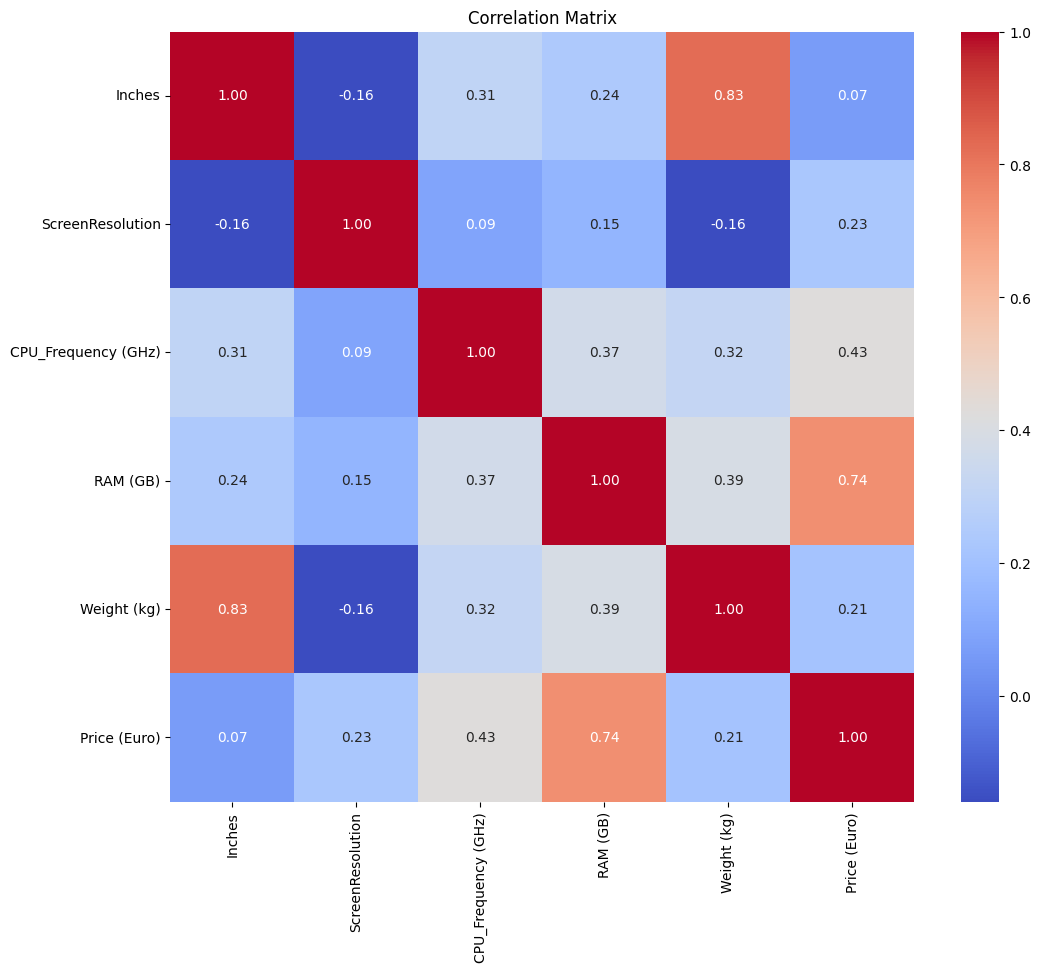

In [44]:
numerical_df = df.select_dtypes(include=['number'])
correlations = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

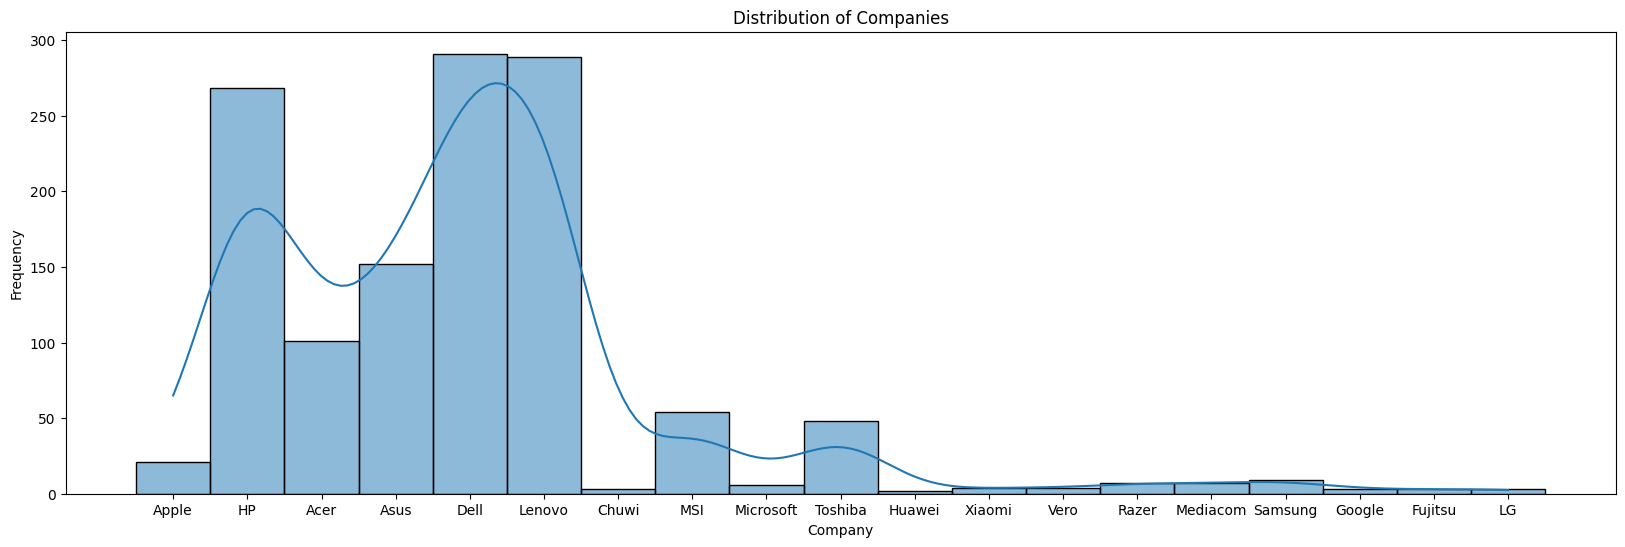

In [45]:
#Histogram
plt.figure(figsize=(20, 6))
sns.histplot(df['Company'], kde=True)
plt.title('Distribution of Companies')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.show()

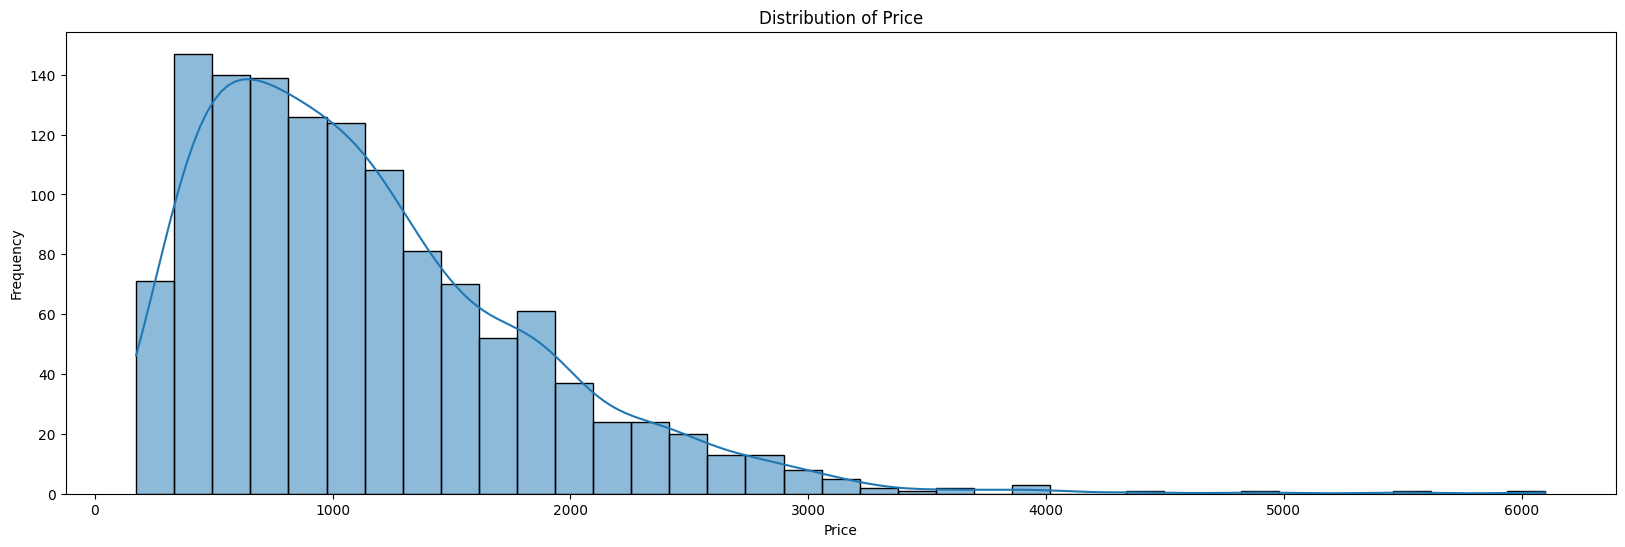

In [46]:
#Histogram
plt.figure(figsize=(20, 6))
sns.histplot(df['Price (Euro)'], kde=True) # Changed 'price' to 'Price (Euro)'
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Features and Targets

In [47]:
X = df.drop(columns=df.columns[14]) #Features
y = df[df.columns[14]] #Target
y

,Price (Euro)
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1270,638.00
1271,1499.00
1272,229.00
1273,764.00


# Labelling and Scalling

In [48]:
#Labelencoder
label_encoder = LabelEncoder()

columns_to_label = ['Company', 'CPU_Company', 'CPU_Type', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys']

for column in columns_to_label:
    df[column] = df[column].astype(str)
    df[column] = label_encoder.fit_transform(df[column])

df = df.drop(columns=['Product','TypeName'])
df.head()

,Company,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,1,13.3,4096000,1,40,2.3,8,4,2,56,8,1.37,1339.69
1,1,13.3,1296000,1,40,1.8,8,2,2,50,8,1.34,898.94
2,7,15.6,2073600,1,46,2.5,8,16,2,52,4,1.86,575.00
3,1,15.4,5184000,1,54,2.7,16,29,0,76,8,1.83,2537.45
4,1,13.3,4096000,1,40,3.1,8,16,2,57,8,1.37,1803.60


In [49]:
X=df
# .drop(columns=df.columns[12])
# y=df[df.columns[12]]
X_scaled = pd.DataFrame(X.drop(columns=['Company','CPU_Company','CPU_Type','Memory','GPU_Company','GPU_Type','OpSys']))
# print(X_scaled.head())


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_scaled)
# y = scaler.fit_transform(y)


X_scaled = pd.DataFrame(X_scaled, columns=['Inches','ScreenResolution','CPU_Frequency (GHz)','RAM (GB)','Weight (kg)', 'Price (Euro)'])
print(X_scaled.head())
X = pd.concat([X[['Company','CPU_Company','CPU_Type','Memory','GPU_Company','GPU_Type','OpSys']], X_scaled], axis=1)
y=X[X.columns[12]]
X=X.drop(columns=df.columns[12])
X.head()

     Inches  ScreenResolution  CPU_Frequency (GHz)  RAM (GB)  Weight (kg)  \
0  0.385542          0.710339             0.518519  0.096774     0.169576   
1  0.385542          0.222928             0.333333  0.096774     0.162095   
2  0.662651          0.358289             0.592593  0.096774     0.291771   
3  0.638554          0.899733             0.666667  0.225806     0.284289   
4  0.385542          0.710339             0.814815  0.096774     0.169576   

   Price (Euro)  
0      0.196741  
1      0.122353  
2      0.067679  
3      0.398895  
4      0.275038  


,Company,CPU_Company,CPU_Type,Memory,GPU_Company,GPU_Type,OpSys,Inches,ScreenResolution,CPU_Frequency (GHz),RAM (GB),Weight (kg)
0,1,1,40,4,2,56,8,0.385542,0.710339,0.518519,0.096774,0.169576
1,1,1,40,2,2,50,8,0.385542,0.222928,0.333333,0.096774,0.162095
2,7,1,46,16,2,52,4,0.662651,0.358289,0.592593,0.096774,0.291771
3,1,1,54,29,0,76,8,0.638554,0.899733,0.666667,0.225806,0.284289
4,1,1,40,16,2,57,8,0.385542,0.710339,0.814815,0.096774,0.169576


In [50]:
# Y to Discrete from Continuous

# # Check if y is continuous and convert to discrete if necessary
# if pd.api.types.is_numeric_dtype(y) and not pd.api.types.is_bool_dtype(y) and y.nunique() > 10:
#   print('true') # Check if continuous and not boolean, threshold 10 to not convert ordinal to classes
#   y = pd.qcut(y, q=10, labels=False, duplicates='drop') # Convert to discrete with 10 quantiles

In [51]:
y.head()

,Price (Euro)
0,0.196741
1,0.122353
2,0.067679
3,0.398895
4,0.275038


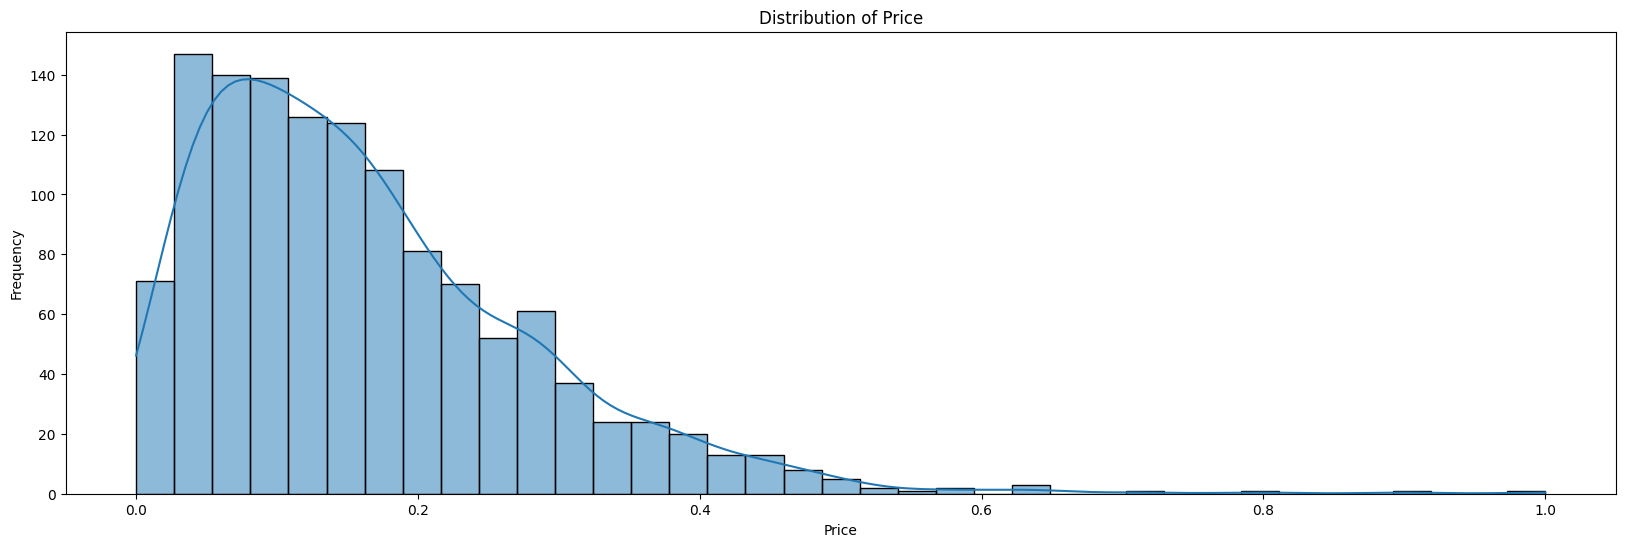

In [52]:
#Histogram
plt.figure(figsize=(20, 6))
sns.histplot(y, kde=True) # Changed 'price' to 'Price (Euro)'
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [53]:
print(y.describe())


count    1275.000000
mean        0.162189
std         0.118270
min         0.000000
25%         0.073418
50%         0.137553
75%         0.223207
max         1.000000
Name: Price (Euro), dtype: float64


## Test Train Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# y_train.unique()

In [56]:
from sklearn.utils.class_weight import compute_sample_weight
def randomforest(X, y, num_folds=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    weights = compute_sample_weight(class_weight='balanced', y=y_train)

    model = RandomForestRegressor(
            n_estimators=100,
            random_state=45,
            max_depth=15,
            min_samples_leaf=3,
            max_features="sqrt",
        )
    model.fit(X_train, y_train, sample_weight=weights)
    y_pred = model.predict(X_test)

    # Calculate and print regression metrics for the final model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Test train Model Mean Squared Error: {mse:.4f}")
    print(f"Test Train Model R-squared: {r2:.4f}")
    residuals = y_test - y_pred
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residuals vs True Price")


    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X)):
      print(f"Fold {fold_idx + 1}:")



      X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
      y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
      weights = compute_sample_weight(class_weight='balanced', y=y_train)
      model.fit(X_train, y_train, sample_weight=weights)

      y_pred = model.predict(X_test)

      # Calculate and print regression metrics for the final model
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)

      print(f"Fold {fold_idx + 1}  Model Mean Squared Error: {mse:.4f}")
      print(f"Fold {fold_idx + 1}  Model R-squared: {r2:.4f}")


Test train Model Mean Squared Error: 0.0010
Test Train Model R-squared: 0.8990
Fold 1:
Fold 1  Model Mean Squared Error: 0.0021
Fold 1  Model R-squared: 0.8481
Fold 2:
Fold 2  Model Mean Squared Error: 0.0026
Fold 2  Model R-squared: 0.8258
Fold 3:
Fold 3  Model Mean Squared Error: 0.0021
Fold 3  Model R-squared: 0.8362
Fold 4:
Fold 4  Model Mean Squared Error: 0.0028
Fold 4  Model R-squared: 0.8197
Fold 5:
Fold 5  Model Mean Squared Error: 0.0024
Fold 5  Model R-squared: 0.8063


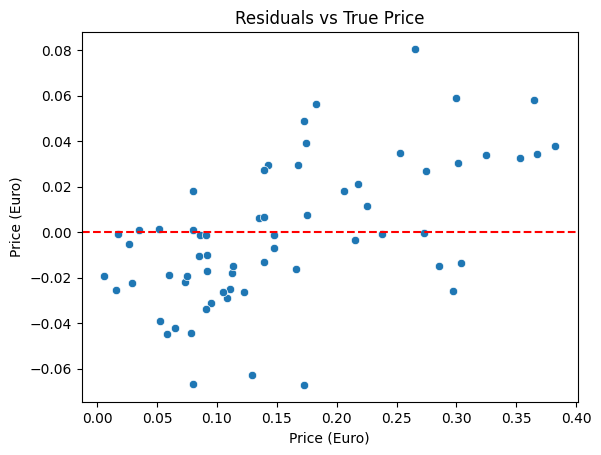

In [57]:
randomforest(X,y)

In [58]:
def xgb_(X, y, num_folds=5):

    kf = KFold(n_splits=num_folds, shuffle=True, random_state=24)


    r2_scores = []
    mse_scores = []
    rmse_scores = []

    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"Fold {fold_idx + 1}:")

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Initialize and train the XGBoost model (Regressor)
        xgb1 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=8,
                                 gamma=0.5, scale_pos_weight=1.5, alpha=0.2,
                                 reg_lambda=0.1)

        xgb1.fit(X_train, y_train)
        y_pred = xgb1.predict(X_test)


        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        rmse = np.sqrt(mse)
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

        print(f"Fold {fold_idx + 1} MSE: {mse:.4f}")
        print(f"Fold {fold_idx + 1} RMSE: {rmse:.4f}")
        print(f"Fold {fold_idx + 1} R-squared: {r2:.4f}")

        print("-" * 30)



    # Calculate and print average metrics across all folds
    avg_r2 = np.mean(r2_scores)
    avg_mse = np.mean(mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print(f"Average R-squared across {num_folds} folds: {avg_r2:.4f}")
    print(f"Average MSE across {num_folds} folds: {avg_mse:.4f}")
    print(f"Average RMSE across {num_folds} folds: {avg_rmse:.4f}")

In [59]:
xgb_(X, y)

Fold 1:
Fold 1 MSE: 0.0062
Fold 1 RMSE: 0.0788
Fold 1 R-squared: 0.6003
------------------------------
Fold 2:
Fold 2 MSE: 0.0044
Fold 2 RMSE: 0.0666
Fold 2 R-squared: 0.5841
------------------------------
Fold 3:
Fold 3 MSE: 0.0065
Fold 3 RMSE: 0.0808
Fold 3 R-squared: 0.5784
------------------------------
Fold 4:
Fold 4 MSE: 0.0070
Fold 4 RMSE: 0.0838
Fold 4 R-squared: 0.5217
------------------------------
Fold 5:
Fold 5 MSE: 0.0056
Fold 5 RMSE: 0.0746
Fold 5 R-squared: 0.5821
------------------------------
Average R-squared across 5 folds: 0.5733
Average MSE across 5 folds: 0.0060
Average RMSE across 5 folds: 0.0769


# Trying a different approach from a Notebook from kaggle

In [60]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    BaggingRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor
)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


model_1 = LinearRegression()
model_2 = SGDRegressor()
model_3 = Lasso()
model_4 = Ridge()
model_5 = ElasticNet()
model_6 = SVR()
model_7 = KNeighborsRegressor()
model_8 = DecisionTreeRegressor()
model_9 = RandomForestRegressor()
model_10 = BaggingRegressor()
model_11 = ExtraTreesRegressor()
model_12 = AdaBoostRegressor()
model_13 = XGBRegressor(verbose=0)
model_14 = LGBMRegressor(verbose=0)

In [62]:
model_1.fit(x_train,y_train)
model_2.fit(x_train,y_train)
model_3.fit(x_train,y_train)
model_4.fit(x_train,y_train)
model_5.fit(x_train,y_train)
model_6.fit(x_train,y_train)
model_7.fit(x_train,y_train)
model_8.fit(x_train,y_train)
model_9.fit(x_train,y_train)
model_10.fit(x_train,y_train)
model_11.fit(x_train,y_train)
model_12.fit(x_train,y_train)
model_13.fit(x_train,y_train)
model_14.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:52:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


LGBMRegressor(verbose=0)

In [63]:
# List of models:
models = [model_1, model_2, model_3, model_4, model_5,
          model_6, model_7, model_8, model_9, model_10,
          model_11, model_12, model_13, model_14]
# The models_names list had an extra item 'CatBoostRegressor'
# It should have the same length as the 'models' list
models_names = ['LinearRegression', 'SGDRegressor', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'BaggingRegressor', 'ExtraTreesRegressor', 'AdaBoostRegressor', 'XGBRegressor', 'LGBMRegressor']

# Calculate predictions and squared errors for each model:
squared_errors = []
for model in models:
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    squared_errors.append(f'{mse * 100:.2f}%')  # Format as percentage

# Calculate train and test scores:
train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]

# Difference between training and testing ratio
ratio = []
for train, test in zip(train_score, test_score):
    result = train - test
    ratio.append(f'{result * 100:.2f}%')

# Measure model state:6
rate = []
for train, test in zip(train_score, test_score):
    if train <= 0.65 and test <= 0.65:
        rate.append('bad')
    elif train > test * 1.10:
        rate.append('overfite')
    elif train > 0.65 and train < 0.80 and test > 0.65 and test < 0.80:
        rate.append('middle')
    elif train >= 0.80 and test >= 0.80 and train < 1.00 and test < 1.00:
        rate.append('good')
    elif train >= 0.80 and test < 0.80:
        rate.append('high train, low test')
    else:
        rate.append('unknown')

# Create DataFrame
model_score = pd.DataFrame({
    'Model': models_names,
    'Train score': [f'{round(score * 100, 2)}%' for score in train_score],
    'Test score': [f'{round(score * 100, 2)}%' for score in test_score],
    'Ratio difference': ratio,
    'Evaluate model': rate,
    'Squared error': squared_errors
})

model_score

,Model,Train score,Test score,Ratio difference,Evaluate model,Squared error
0,LinearRegression,67.55%,69.18%,-1.63%,middle,0.44%
1,SGDRegressor,-4.9937478715420545e+28%,-4.93889599096089e+28%,-548518805811639716151296000.00%,bad,698283552655970393697288192.00%
2,Lasso,0.0%,-0.53%,0.53%,bad,1.42%
3,Ridge,66.94%,67.81%,-0.87%,middle,0.46%
4,ElasticNet,16.73%,14.58%,2.15%,bad,1.21%
5,SVR,43.15%,40.45%,2.71%,bad,0.84%
6,KNeighborsRegressor,74.35%,63.01%,11.35%,overfite,0.52%
7,DecisionTreeRegressor,99.82%,76.15%,23.67%,overfite,0.34%
8,RandomForestRegressor,97.39%,88.28%,9.11%,overfite,0.17%
9,BaggingRegressor,96.52%,86.74%,9.78%,overfite,0.19%
